<a href="https://colab.research.google.com/github/Junio-Rodrigo-Silva/Ada-Estatistica/blob/main/Projeto_An%C3%A1lise_Explorat%C3%B3ria_dos_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Salários em Data Science

Contexto:



No campo em rápida evolução da ciência de dados, compreender as tendências e padrões salariais é crucial tanto para profissionais como para organizações. Este projeto tem como objetivo apresentar o  cenário dos salários da ciência de dados de 2020 a 2024.



Ao analisar os dados salariais durante esse período, entusiastas de dados, pesquisadores e profissionais do setor podem obter informações valiosas sobre tendências salariais, variações regionais e fatores potenciais que influenciam a remuneração. dentro da comunidade de ciência de dados.



O conjunto de dados abrange uma coleção abrangente de informações salariais de ciência de dados, cobrindo um período de cinco anos, de 2020 a 2024. Os dados incluem vários aspectos relacionados aos salários, proporcionando uma visão multifacetada da remuneração na área.

## Dicionário de Variáveis
O dataset que foi utilizado conta com o seguinte dicionário de variáveis:

job_title: o cargo ou função associado ao salário informado.

experience_level: o nível de experiência do indíviduo.

employment_type: indica o tipo de trabalho associado ao tempo gasto.

work_models: descrição do modelo de trabalho (remoto, presencial ou híbrido).

work_year: ano em que as informações salariais foram registradas.

employee_residence: o local de residência do funcionário.

salary: o salário informado na moeda original.

salary_currency: identificação da moeda corrente.

salary_in_usd: salário convertido em doláres americanos.

company_location: localização geográfica da organização empregadora.

company_size: o tamanho da empresa, levando em conta o número de funcionários da empresa.

O link do dataset pode ser encontrado em: https://www.kaggle.com/datasets/sazidthe1/data-science-salaries


## 1- Importar as bibliotecas

In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px

# Mostrar todas as colunas de um dataframe
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

## 2- Importar a base

In [6]:
df = pd.read_csv('data_science_salaries.csv')

## 3- Verificar a estrutura da base

In [13]:
# Analisando as 5 primeiras linhas
df.head(5)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [15]:
# Analisando as 5 últimas linhas
df.tail(5)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
11082,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
11083,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
11084,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
11085,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large
11086,Data Scientist,Senior-level,Full-time,On-site,2020,Austria,80000,EUR,91237,Austria,Small


## 4- Análise de Consistência dos Dados

In [16]:
# Verificando o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11087 entries, 0 to 11086
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           11087 non-null  object
 1   experience_level    11087 non-null  object
 2   employment_type     11087 non-null  object
 3   work_models         11087 non-null  object
 4   work_year           11087 non-null  int64 
 5   employee_residence  11087 non-null  object
 6   salary              11087 non-null  int64 
 7   salary_currency     11087 non-null  object
 8   salary_in_usd       11087 non-null  int64 
 9   company_location    11087 non-null  object
 10  company_size        11087 non-null  object
dtypes: int64(3), object(8)
memory usage: 952.9+ KB


Analisando o tipo de dados, verificado que estão corretos e não é necessário algum tratamento.

In [17]:
# Verificando se existe números nulos em alguma coluna
df.isna().mean()

job_title             0.0
experience_level      0.0
employment_type       0.0
work_models           0.0
work_year             0.0
employee_residence    0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
company_location      0.0
company_size          0.0
dtype: float64

Como não há a existência de valores nulos no dataset, não é necessário algum tratamento.

<Axes: ylabel='salary_in_usd'>

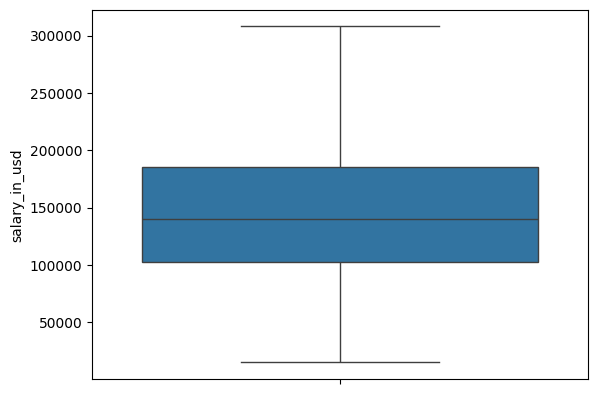

In [22]:
# Para identificar possíveis Outliers, utilizaremos um boxplot da váriável salary_in_usd.
sn.boxplot(y='salary_in_usd', data=df)

Verifica-se a existência de outliers. Faremos uso da distância interquartil (IQR) associado aos valores agrupados no 1° Quartil (Valor que separa os 25% menores valores da coluna) e 3° Quartil (Valor que separa os 25% maiores valores da coluna) como método para tratativa dos outliers.

In [19]:
# Cálculo IQR para variável 'salary_in_usd'
q1_salary = df.salary_in_usd.quantile(.25)
q3_salary = df.salary_in_usd.quantile(.75)
IQR_salary = q3_salary - q1_salary
print(f'Valor 1º Quartil: {q1_salary:.2f} dólares')
print(f'Valor 3º Quartil: {q3_salary:.2f} dólares')
print(f'Valor do IQR: {IQR_salary:.2f} dólares')

# Limite para considerar outlier
salary_top = q3_salary + (1.5 * IQR_salary)
print(f'Valor Limite Superior: {salary_top:.2f} dólares')

Valor 1º Quartil: 104000.00 dólares
Valor 3º Quartil: 185900.00 dólares
Valor do IQR: 81900.00 dólares
Valor Limite Superior: 308750.00 dólares


In [20]:
# Quantidade de valores acima de 308750 para salary
print(f'{len(df[df.salary_in_usd > 308750])} entradas')
print(f'{(len(df[df.salary_in_usd > 308750]) / df.shape[0])*100:.2f} %')

203 entradas
1.83 %


Por meio da IQR, checamos que o limite superior é de um salário de 308.750 dólares. Quando buscamos a representatividade deste público temos um share de apenas 1,83% de todas as informações disponíveis no dataset. Desse modo, seguiremos com a exclusão destes casos da base para que não haja interferência nas análises estatísticas do dataset.

Text(0.5, 1.0, 'BoxPlot da Variável Salário sem Outliers')

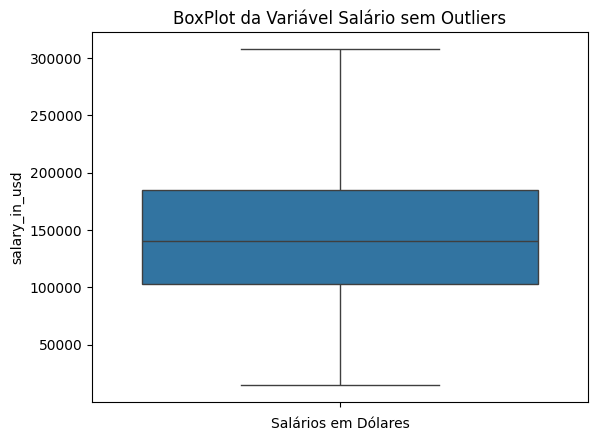

In [25]:
# Remoção dos outliers da variável 'salary_in_usd'
df.drop(df[df.salary_in_usd > 308750].index, axis=0, inplace=True)

# Plot do Boxplot Pós Retirada dos Outliers
sn.boxplot(y='salary_in_usd', data=df)
plt.xlabel('Salários em Dólares')
plt.title('BoxPlot da Variável Salário sem Outliers')

## 5- Análise Exploratória dos Dados

5.1- Qual é a distribuição salarial por cargo no dataset?

In [28]:
cargos_distintos = df['job_title'].nunique()
print(f'Variedade de cargos distintos no dataset: ',cargos_distintos)

Variedade de cargos distintos no dataset:  130


Como o número de cargos é muito amplo, verificaremos qual a representatividade de cada cargo no dataset.


In [34]:
# Verificação dos cargos mais representativos
count_jobs = df['job_title'].value_counts()
print(count_jobs)

Data Engineer                2484
Data Scientist               2260
Data Analyst                 1647
Machine Learning Engineer    1120
Research Scientist            330
                             ... 
Deep Learning Researcher        1
Power BI Developer              1
Data Analyst Lead               1
AI Product Manager              1
Sales Data Analyst              1
Name: job_title, Length: 130, dtype: int64


Analisando a representatividade de cada cargo, iremos analisar os cargos que possuem representatividade acima de 1000.

In [35]:
# Cargos com representatividade acima de 1000
count_jobs = df['job_title'].value_counts()
count_jobs_big = count_jobs[count_jobs > 1000]
print(count_jobs_big)

Data Engineer                2484
Data Scientist               2260
Data Analyst                 1647
Machine Learning Engineer    1120
Name: job_title, dtype: int64


In [36]:
# Criando um novo dataset apenas com as informações dos cargos mais representativos na amostra
df_cargos = df.copy()
df_cargos = df_cargos[df_cargos['job_title'].isin(['Data Engineer', 'Data Scientist','Data Analyst', 'Machine Learning Engineer'])]

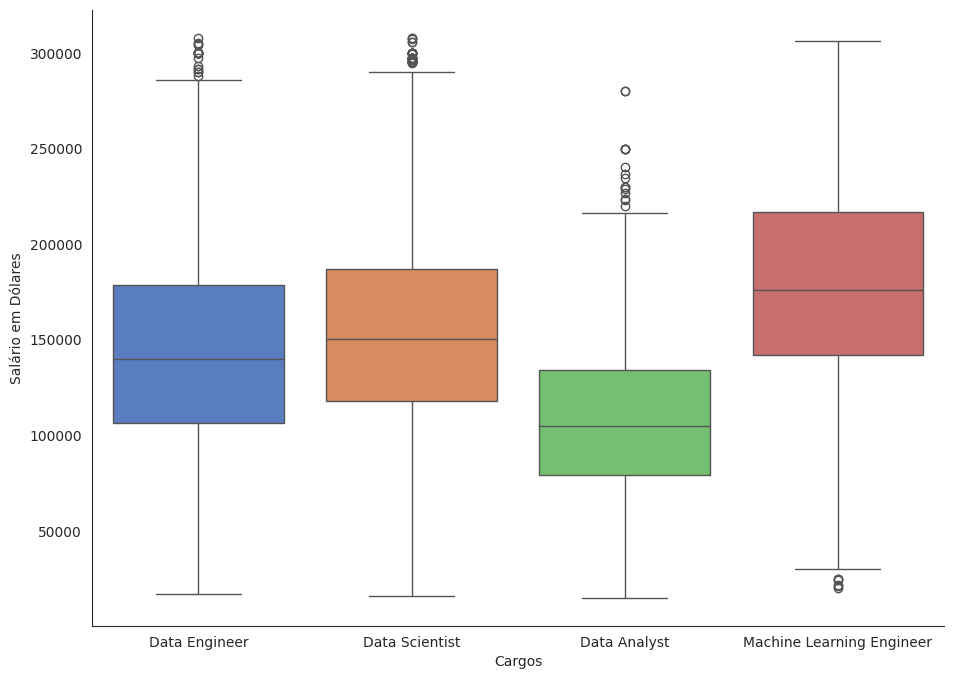

In [38]:
# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 8))
sn.set_style("white")

# boxplot da variável cargos em relação ao salário em dólares
ax = sn.boxplot(x='job_title', y='salary_in_usd',data=df_cargos, showfliers=True, palette='muted')
plt.xlabel('Cargos')
plt.ylabel('Salário em Dólares')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [39]:
# Cálculo da média e mediana dos 4 principais cargos
media_cargo = df_cargos.groupby('job_title')['salary_in_usd'].mean()
mediana_cargo = df_cargos.groupby('job_title')['salary_in_usd'].median()

# Criar dataframe para visualização
df_resultados = pd.DataFrame({'Média': media_cargo, 'Mediana': mediana_cargo})
print(df_resultados)

                                   Média   Mediana
job_title                                         
Data Analyst               107629.527019  105000.0
Data Engineer              145069.015700  139700.0
Data Scientist             152419.494690  150160.0
Machine Learning Engineer  178996.683036  176000.0


O Data Analyst apresenta uma média salarial de 107.629, figurando como o cargo com menor média salarial. O cargos de Data Scientist e Data Engineer apresentam médias salariais próximas, de 152.419 e 145.069, respectivamente. Figurando na ponta, temos o Machine Learning Engineer, com média salarial de 178.996. Em um primeiro momento, busca-se explicar essa diferenciação salarial entre os cargos por conta dos limitantes técnicos que cada um dos cargos apresentam.

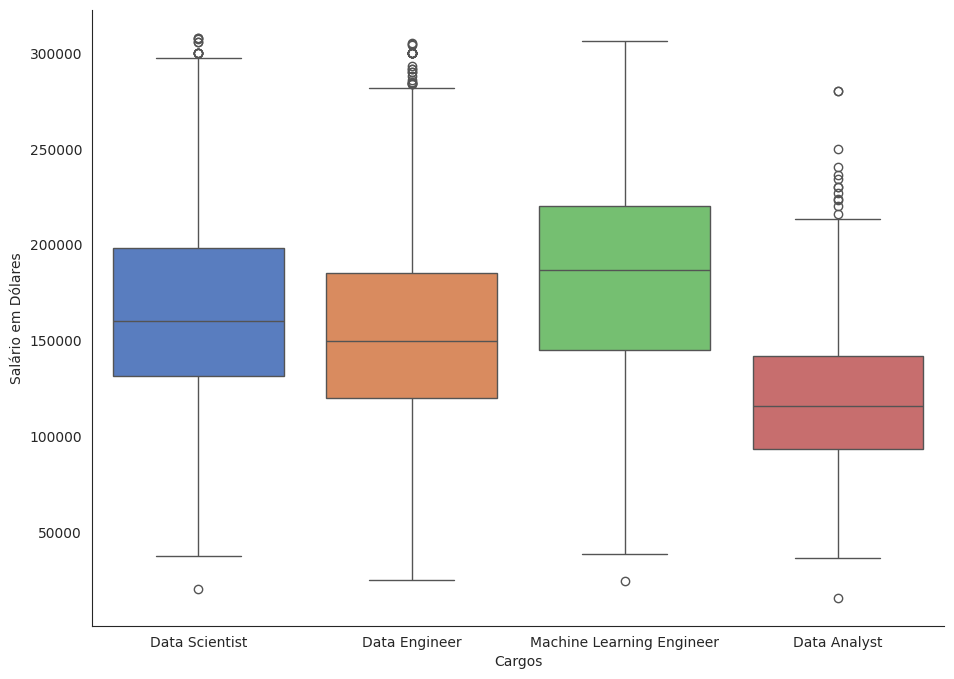

In [40]:
# Focalizando a análise apenas nas informações de sênior
df_cargos = df_cargos[df_cargos['experience_level'].isin(['Senior-level'])]

# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 8))
sn.set_style("white")

#Plotando o boxplot da cargos em relação ao salário em dólares
ax = sn.boxplot(x='job_title', y='salary_in_usd',data=df_cargos, showfliers=True, palette='muted')
plt.xlabel('Cargos')
plt.ylabel('Salário em Dólares')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Analisando por nível de experiência sênior, nota-se o mesmo comportamento da distribuição apresentada com a amostra completa.

5.2- Evolução do salário médio ao longo dos anos

In [41]:
# Compreender o volume de informações para cada ano
count_anos = df['work_year'].value_counts()
print(count_anos)

2023    8352
2022    1640
2024     604
2021     216
2020      72
Name: work_year, dtype: int64


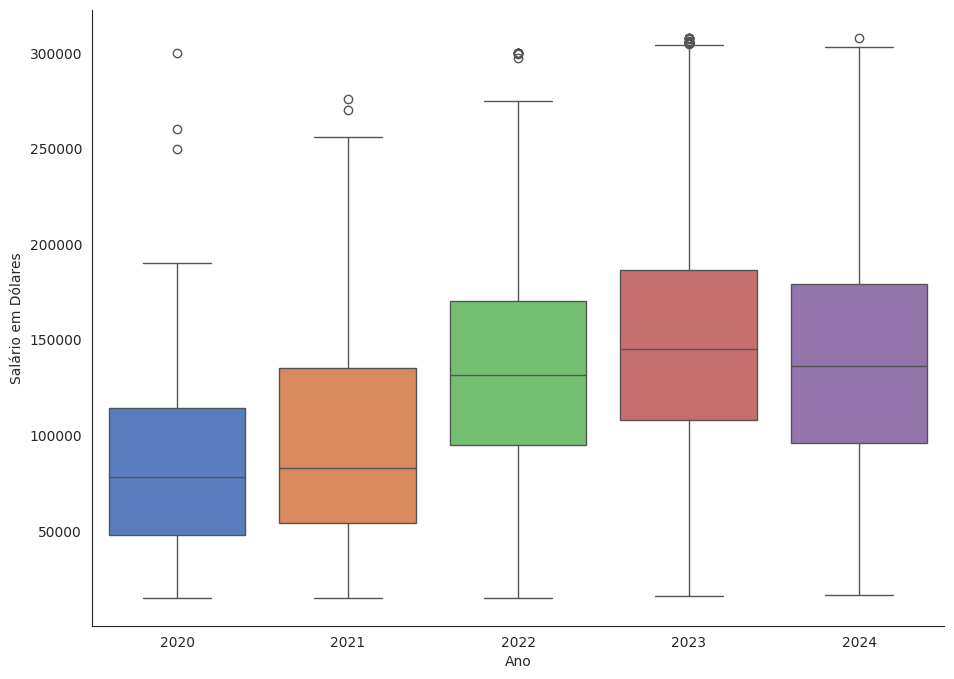

In [42]:
# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 8))
sn.set_style("white")

#Plotando o boxplot da variável ano em relação ao salário em dólares
ax = sn.boxplot(x='work_year', y='salary_in_usd',data=df, showfliers=True, palette='muted')
plt.xlabel('Ano')
plt.ylabel('Salário em Dólares')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [43]:
df['salary_in_usd'].describe()

count     10884.000000
mean     145565.446068
std       59026.317370
min       15000.000000
25%      102905.000000
50%      140100.000000
75%      185000.000000
max      308000.000000
Name: salary_in_usd, dtype: float64

O gráfico apresenta a tendência de crescimento anual na área de Data Science.

5.3 - Existe uma variação salarial pelo nível de experiência?

Text(0.5, 1.0, 'Relação entre Salário e Nível de Experiência')

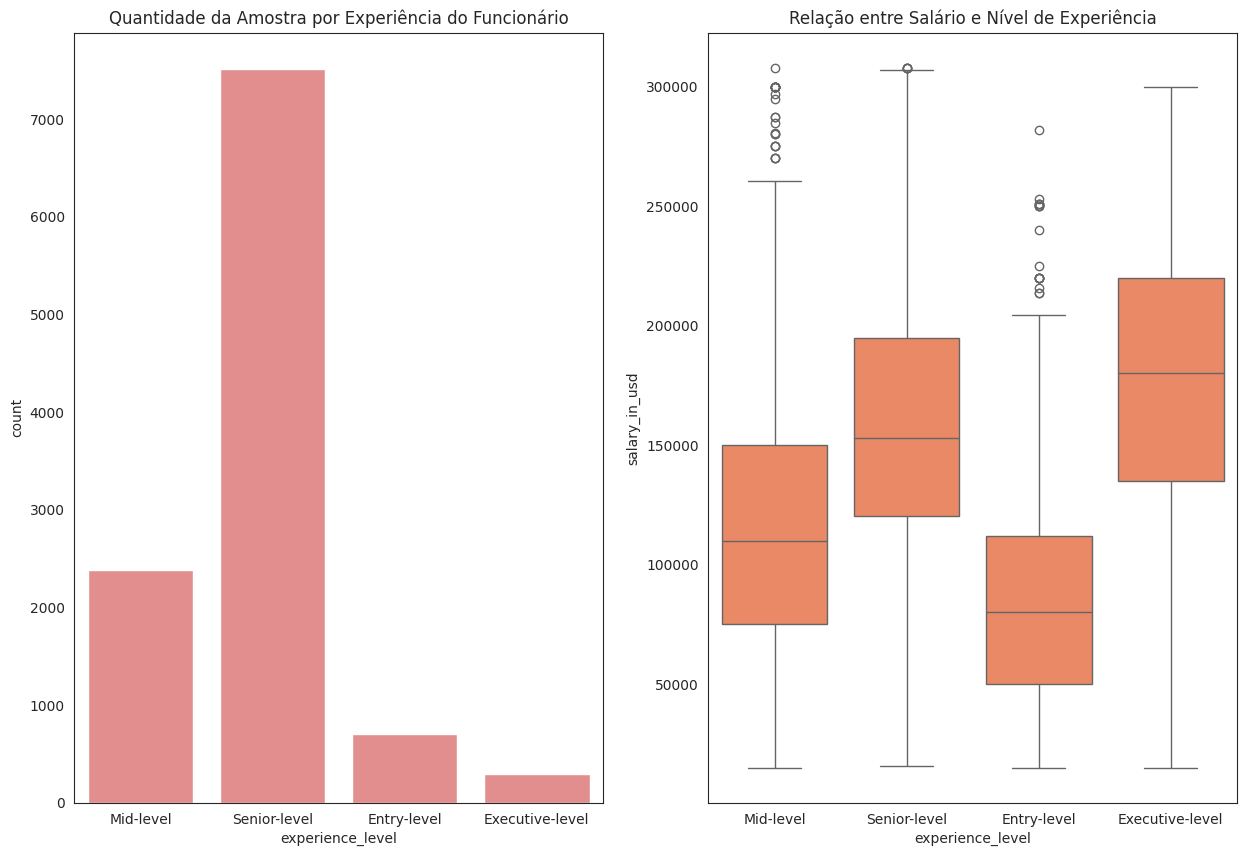

In [44]:
# Subplot de 2 gráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Gráfico 1
sn.countplot(x='experience_level', data=df, ax=axes[0],color='lightcoral')
axes[0].set_title('Quantidade da Amostra por Experiência do Funcionário')

#Gráfico 2
sn.boxplot(x='experience_level', y='salary_in_usd', data=df, ax=axes[1], color='coral')
axes[1].set_title('Relação entre Salário e Nível de Experiência')

Os gráficos apresentam que um profissional nível Junior possui um salário médio de 77.000 dólares, um profissional de nível sênior apresenta uma média salarial de 153k, já o profissional de cargo executivo apresenta uma média salárial de
180.000. Interessante notar a presença de alguns salários outliers quando agrupados por nível de experiência, como a presença profissionais de nível Junior ganhando acima de 200.000.

## Conclusões

Há pouco mais de 10 anos atrás foi publicado um artigo que conceituava o cientista de dados como a profissão mais sexy do mundo. Uma década depois observamos o crescimento cada vez maior da área, repleto de novos desdobramentos e desenvolvimentos constantes. A presente análise buscou analisar um dataset com vistas a trazer visões e interpretações acerca do atual contexto da área, que podem ser resumidos:

Dentre os principais cargos da amostra (Data Engineer, Data Analyst, Data Scientist, Machine Learning Engineer) temos os profissionais de ML Engineer com as maiores médias salariais, superando a média de 175.000 doláres.

Grande parte da amostra advém de informações dos anos de 2022 e 2023, representando um crescimento das médias salariais, muito em linha com o contexto pós pandemia;

Existe uma correlação positiva entre a senioridade do profissional e o salário recebido;

Existem Outliers no dataset que podem interferir na análise em relação aos salários uma vez que alguns profissionais com nível junior receberam salários equivalentes aos profissionais de nível sênior e executivo.
